In [1]:
#Import data
import pandas as pd
DATAFILE = "join_with_scorecard2.csv"
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))

['mean_unexpcost', 'median_unexpcost', 'mean_return', 'median_return', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_return_qty', 'median_return_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'num_orders_purch', 'num_returns_purch', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', 'num_transactions_expo', '%Late', '%Early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [2]:
#Select features
PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
Purch_PCA = Purchase_DF[PCA_feats]
Purch_PCA = Purch_PCA.dropna()

In [3]:
#PCA Script + Run
from sklearn.decomposition import PCA
import numpy as np
def PCA_method(data):
    pca_model = PCA()
    pca_model.n_components = 6
    pca_fit = pca_model.fit(data)
    print("explained variance")
    print(pca_fit.explained_variance_ratio_)
    var_sum = sum(pca_fit.explained_variance_ratio_)
    print([p for p in pca_fit.explained_variance_ratio_])
    
    print("components")
    # matrix of size n_components X n_features
    # a_i,j tells how much the jth feature contributed to the ith component
    comp = pca_fit.components_
    print(comp)
    # summing along columns tells how much each feature contributes overall
    comp_sum = np.sum(comp, axis = 0)
    print(comp_sum)
    return pca_fit
pca=PCA_method(Purch_PCA) 
comp = pca.components_
params = pca.explained_variance_ratio_

explained variance
[0.24748933 0.16729543 0.11952216 0.11367904 0.10655688 0.08821004]
[0.24748932868509094, 0.16729542675955586, 0.11952216386563415, 0.11367904378846158, 0.1065568837251793, 0.08821004081399623]
components
[[ 8.23031268e-02 -3.28690811e-03  2.12563558e-01 -6.23292897e-02
  -8.12929650e-02  4.77329183e-02 -9.56528313e-01 -3.72804997e-03
   2.34428063e-03 -9.32387623e-02 -1.48759747e-02  1.06675387e-01]
 [-5.04570485e-02 -3.49761830e-02  8.85801653e-01 -1.44812903e-01
  -7.38027926e-02  3.89011702e-02  1.95473908e-01  1.07988985e-03
  -8.76835254e-02 -1.85054201e-01 -9.86047054e-02 -3.06247766e-01]
 [-1.23510549e-01  2.53920091e-02  2.47240008e-01 -3.67588945e-01
   1.87904695e-01  2.94932055e-01  6.68452337e-02  9.48742123e-04
   4.88268500e-02  6.03410281e-01  8.02560296e-02  5.36805179e-01]
 [ 4.30596426e-01 -9.53808034e-03  2.38812548e-01  7.76614003e-01
   1.97175920e-02  2.51559568e-01  7.41748639e-02  6.03929637e-04
  -1.27347138e-02  7.51723842e-02  1.61861995e-

In [4]:
#Factor Analysis Script + Run
from sklearn.decomposition import FactorAnalysis
import numpy as np

FA_model = FactorAnalysis(svd_method = 'lapack')
FA_model.n_components = 6
FA_fit = FA_model.fit(Purch_PCA)
print("covariance")
print(FA_fit.get_covariance())
print("precision")
print(FA_fit.get_precision())
# print("noise")
# print(FA_fit.noise_variance_)
# print('Loglike')
# print(FA_fit.loglike_)
print("components")
# matrix of size n_components X n_features
# a_i,j tells how much the jth feature contributed to the ith component
compFA = FA_fit.components_
print(compFA)
# summing along columns tells how much each feature contributes overall
comp_sum = np.sum(compFA, axis = 0)
print([p for p in comp_sum])
FA = FA_fit

covariance
[[ 4.25248617e-01 -5.26977916e-03  1.57908014e-02  1.79814106e-01
  -2.60021651e-02  2.55010304e-02 -1.07766202e-01 -1.13230907e-03
   1.71875945e-03 -1.84834990e-02 -6.89868876e-03  3.13814083e-02]
 [-5.26977916e-03  6.00837438e-02 -3.22145575e-02 -5.04578109e-03
   2.45456432e-02  1.97113798e-03 -3.81420039e-03  4.67395612e-04
  -1.82703204e-03  1.43100271e-02  1.00061036e-02  1.68901786e-02]
 [ 1.57908014e-02 -3.22145575e-02  1.08839847e+00 -7.89418696e-02
  -6.68402330e-02  7.18789062e-02 -1.23589019e-01  7.23558672e-04
  -6.65537145e-02 -8.30414376e-02 -7.61988574e-02 -7.87462236e-02]
 [ 1.79814106e-01 -5.04578109e-03 -7.89418696e-02  6.95289757e-01
   1.31749974e-03  9.23283239e-03  6.12630903e-02  7.51807905e-04
  -2.64272372e-03  1.65218362e-03  1.08904004e-04 -5.45930587e-03]
 [-2.60021651e-02  2.45456432e-02 -6.68402330e-02  1.31749974e-03
   4.17675331e-01  1.16046152e-01  8.24859273e-02 -1.33632505e-03
   4.31217120e-02  1.01427177e-01  1.16794941e-02 -3.27587682

In [5]:
import matplotlib.pyplot as plt

In [6]:
#Generate vars for plotting
# PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
#              'mean_leadtime', 'mean_abc', 'mean_source',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
uncost = [i[0] for i in comp]
ret = [i[1] for i in comp]
qty = [i[2] for i in comp]
costsave = [i[3] for i in comp]
spend = [i[4] for i in comp]
leadtime = [i[5] for i in comp]
source = [i[6] for i in comp]
late = [i[7] for i in comp]
early = [i[8] for i in comp]
critical = [i[9] for i in comp]
qualrisk = [i[10] for i in comp]
delrisk = [i[11] for i in comp]

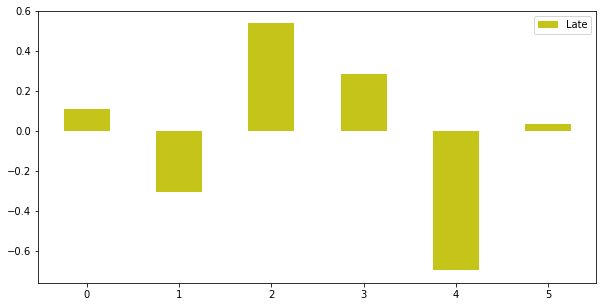

In [7]:
# PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
#              'mean_leadtime', 'mean_abc', 'mean_source',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
index = np.arange(6)
error_config = {'ecolor': '0.3'}
bw = 0.5
op=0.9
plt.figure(figsize=(10,5))
# rects18 = plt.bar(index, qty, bw,
#                  alpha=op,
#                  color='black',
#                  error_kw=error_config,
#                  label='Unexpected Cost')
rects1 = plt.bar(index, delrisk, bw,
                 alpha=op,
                 color='y',
                 error_kw=error_config,
                 label='Late')
# rects2 = plt.bar(index, early,bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='early')
# rects3 = plt.bar(index, critical, bw,
#                  alpha=op,
#                  color='orange',
#                  error_kw=error_config,
#                  label='critical')
# rects4 = plt.bar(index, spend, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='spend')
# rects5 = plt.bar(index, qualrisk, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='qualrisk')
# rects6 = plt.bar(index, delrisk, bw,
#                  alpha=op,
#                  color='y',
#                  error_kw=error_config,
#                  label='delrisk')
# rects7 = plt.bar(index, abc, bw,
#                  alpha=op,
#                  color='pink',
#                  error_kw=error_config,
#                  label='abc')
plt.legend()
plt.show()


In [8]:
#Varimax Algorithm
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [9]:
sol = varimax(comp)

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in double_scalars


In [10]:
#Generate DFs
fa = pd.DataFrame(data = compFA,columns = PCA_feats)
orig = pd.DataFrame(data = comp,columns = PCA_feats)
varimax = pd.DataFrame(data = sol,columns = PCA_feats)
fa = fa.transpose()
orig = orig.transpose()
varimax = varimax.transpose()
# orig = pd.DataFrame(orig, columns = compnames)
# varimax = pd.DataFrame(varimax, columns = compnames)

In [11]:
print(list(fa))
fa

[0, 1, 2, 3, 4, 5]


,0,1,2,3,4,5
mean_unexpcost,-0.060179,0.188648,-0.269812,0.019963,-0.131156,0.027396
mean_return,0.049274,0.023213,0.027512,-0.030782,-0.001087,0.044219
mean_qty,-0.250733,-0.299102,-0.056431,0.034090,-0.364889,-0.242243
mean_costsave,-0.000537,0.292502,-0.501018,-0.099810,0.060594,-0.023329
mean_spend,0.477708,-0.102598,-0.049880,-0.119517,-0.079381,0.022522
mean_leadtime,0.211526,-0.004722,-0.046754,0.022589,-0.229885,-0.149487
mean_source,0.174172,-0.131711,-0.057766,-0.291252,0.550675,-0.364474
mean_late,-0.008601,0.000287,0.003933,-0.025753,0.000909,-0.000349
mean_early,0.194622,0.046220,-0.026612,0.340269,0.064886,-0.027425
%Critical,0.222795,0.058755,0.043363,-0.045340,0.024301,-0.013434


In [12]:
print(list(orig))
orig

[0, 1, 2, 3, 4, 5]


,0,1,2,3,4,5
mean_unexpcost,0.082303,-0.050457,-0.123511,0.430596,0.045266,0.116123
mean_return,-0.003287,-0.034976,0.025392,-0.009538,0.007536,-0.008352
mean_qty,0.212564,0.885802,0.247240,0.238813,-0.043243,0.134912
mean_costsave,-0.062329,-0.144813,-0.367589,0.776614,0.136135,0.093178
mean_spend,-0.081293,-0.073803,0.187905,0.019718,0.310468,-0.328661
mean_leadtime,0.047733,0.038901,0.294932,0.251560,0.190685,-0.774307
mean_source,-0.956528,0.195474,0.066845,0.074175,-0.162425,-0.020475
mean_late,-0.003728,0.001080,0.000949,0.000604,-0.005397,0.007996
mean_early,0.002344,-0.087684,0.048827,-0.012735,0.111121,-0.116588
%Critical,-0.093239,-0.185054,0.603410,0.075172,0.559622,0.486440


In [13]:
print(list(varimax))
varimax

[0, 1, 2, 3, 4, 5]


,0,1,2,3,4,5
mean_unexpcost,-7.168826e-18,1.186667e-17,1.790133e-18,8.082088e-18,-1.626050e-17,-1.083661e-17
mean_return,-4.163076e-17,1.365497e-16,6.176519e-17,-2.114651e-18,-6.665944e-17,-1.052073e-16
mean_qty,2.026154e-15,1.000000e+00,4.776579e-15,1.276939e-15,-2.096751e-15,1.867480e-15
mean_costsave,7.213518e-17,-1.310459e-15,-8.285653e-16,1.000000e+00,4.424350e-15,2.492992e-15
mean_spend,1.889777e-16,-3.997492e-18,4.108008e-17,-1.764308e-16,2.132318e-17,9.726397e-18
mean_leadtime,3.995896e-16,1.557911e-15,-1.917689e-15,2.171455e-15,2.408284e-16,-1.000000e+00
mean_source,-1.000000e+00,1.939478e-15,-7.688618e-17,3.295624e-16,-2.539047e-15,-3.712230e-16
mean_late,-2.100947e-17,-3.687885e-18,-1.895725e-17,3.774377e-17,-8.100402e-17,3.929600e-17
mean_early,-1.040834e-17,2.081668e-17,-2.775558e-17,-3.469447e-17,0.000000e+00,-2.775558e-17
%Critical,-1.318390e-16,-5.079270e-15,1.000000e+00,6.678685e-16,-1.727785e-15,-1.269818e-15


In [14]:
PCA_feats[0]

'mean_unexpcost'

In [31]:
def RowGen(data):
    name = "join_with_scorecard2.csv"
    feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
    feats0 = ['0','1','2','3','4','5']
    df = pd.read_csv(name)
#     df['0'] = np.nan
#     df['1'] = np.nan
#     df['2'] = np.nan
#     df['3'] = np.nan
#     df['4'] = np.nan
#     df['5'] = np.nan
#     pd.to_numeric(df2['0'], downcast='float')
#     pd.to_numeric(df2['1'], downcast='float')
#     pd.to_numeric(df2['2'], downcast='float')
#     pd.to_numeric(df2['3'], downcast='float')
#     pd.to_numeric(df2['4'], downcast='float')
#     pd.to_numeric(df2['5'], downcast='float')
    for feat in feats0:
        df[feat] = np.nan
        pd.to_numeric(df[feat], downcast = 'float')
    for i, row in data.iterrows():
        for c in feats0:
            k = 0
            for j,a,b in zip(list(range(1, 13)),feats,data.iterrows()):
                k = k + df[a][i] * data[c][j]
            df[feats0[c]][i] = k
    return df      

In [32]:
df_pca = RowGen(orig)
df_pca

KeyError: 'mean_unexpcost'

In [28]:
df_varimax = RowGen(varimax)
df_varimax

TypeError: list indices must be integers or slices, not str

In [28]:
df_fa = RowGen(fa)
df_fa

TypeError: list indices must be integers or slices, not str

In [ ]:
df_pca.to_csv("PCA_original.csv", index = False)
df_varimax.to_csv("PCA_varimax.csv", index = False)
df_fa.to_csv("FA.csv", index = False)

In [ ]:
# params

In [ ]:
# comp_sum

In [ ]:
# fa.to_csv("FA.csv", index = False)
# orig.to_csv("PCA_original.csv", index = False)
# varimax.to_csv("PCA_Varimax.csv", index = False)
# np.savetxt("PCA_explainedvariance.csv", params, delimiter=",")

In [ ]:
# print(sol)

#### Tsne

In [ ]:
# def Labels_to_color (df, classif,label_col):
#     """
#     For a dataframe (df) and its classification (classif) it 
#     turns each class label to numerical values and returns the dataframe
#     """
    
#     ClassList= df[classif].unique()
#     id = 0
#     color = ['b', 'g', 'r', 'y',  'w', 'c']

#     marker = ['o','x','+','^','s','v']
#     ClassDict = {}
#     for ClassVal in ClassList:
        
#         ClassDict[ClassVal]= color[id]
#         id = id+1
#     print(ClassDict)
#     for ClassNum in ClassDict.keys():
#         df.ix[df[classif]==ClassNum,label_col] = ClassDict[ClassNum]
#         print (ClassDict[ClassNum])
#     df=df.drop(classif,axis =1)
#     print(df[label_col].unique())
        
#     return df

In [ ]:
# q23 = 0
# q24 = 1
# if(q24/q23 < 2):
#     print (q23)

In [ ]:
# pca=PCA_method(Purch_PCA) 
# comp = pca.components_

In [ ]:
# # pca = PCA(n_components=7)
# X = Purch_PCA
# # pca.fit(X)
# X_pca = pca.transform(X)
# print("original shape:   ", X.shape)
# print("transformed shape:", X_pca.shape)
# # q.transform()

In [ ]:
# X_new = pca.inverse_transform(X_pca)
# plt.scatter(X[:, 0], X[:, 3], alpha=0.2)
# plt.scatter(X_new[:, 0], X_new[:, 3], alpha=0.8)
# plt.axis('equal');
# print (X_new)
# # print(list(X_new))